<a href="https://colab.research.google.com/github/Joseph89155/exploratory-data-analysis-titanic/blob/main/Titanic_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Survival on the Titanic: A Data-Driven Exploration

## 📌 Project Overview
This project is a comprehensive Exploratory Data Analysis (EDA) of the Titanic dataset from Kaggle. It seeks to extract meaningful insights and patterns that may have influenced survival on board the Titanic. Through structured data profiling, visual exploration, and critical reasoning, this analysis uncovers not only statistical patterns but also the real-life implications of data-driven decisions.

## 🎯 Objectives
- Conduct initial profiling: understand data types, structure, and missingness.
- Perform univariate, bivariate, and multivariate analysis.
- Detect and justify handling of outliers.
- Explore the impact of variables on the target feature: `Survived`.
- Practice clear, reproducible data science techniques using Python.
- Present findings on Kaggle with compelling storytelling and visualizations.

## 👤 Author
**Joseph Maina**  
*Aspiring Data Scientist*  


## 🌍 Real-World Framing
Understanding the Titanic disaster through the lens of data offers a way to reflect on how demographics and socio-economic factors may have impacted survival rates. The analysis showcases how EDA techniques can help uncover patterns that may be useful in broader contexts, such as disaster preparedness and policy design.

## 🛠️ Tools Used
- Python 🐍 (pandas, numpy, seaborn, matplotlib)
- Google Colab
- Kaggle Dataset: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)


## Setting up the Environment

In [2]:
# 🧰 Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 📂 Load the Dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)



In [3]:
# 👀 Preview the head of the Dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 👀 Preview the tail of the Dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 📊 Step 2: Initial Data Exploration & Profiling

## 🎯 Goals
- Understand the overall structure and quality of the dataset.
- Identify data types, missing values, and duplicated entries.
- Get summary statistics to guide further analysis.
- Spot potential categorical vs numerical features.


In [5]:
# 👁️ Quick Look at the Data
print("Preview of the dataset:")
display(df.head())

Preview of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 🔍 Dataset Shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 891 rows and 12 columns.


In [7]:
# ℹ️ General Information
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 📊 Summary Statistics
print("\nSummary Statistics (Numerical Columns):")
display(df.describe())


Summary Statistics (Numerical Columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# 🧮 Unique Value Counts
print("\nNumber of unique values per column:")
display(df.nunique())


Number of unique values per column:


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [10]:
# 🧱 Data Types
print("\nData types:")
display(df.dtypes)


Data types:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [11]:
# 🧍‍♂️ Checking for Duplicates
print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")


Number of duplicated rows: 0


In [12]:
# 🕳️ Checking for Missing Values
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## ✅ Key Observations

- The dataset contains **891 rows and 12 columns**, with no duplicate entries.
- **Missing Values**:
  - `Age`: Missing in 177 rows (~20%).
  - `Cabin`: Missing in 687 rows (~77%) — we may consider dropping or heavily preprocessing this.
  - `Embarked`: Missing in 2 rows.
- **Categorical vs. Numerical**:
  - Categorical: `Sex`, `Pclass`, `Embarked`, possibly `Cabin`, `Ticket`.
  - Numerical: `Age`, `Fare`, `SibSp`, `Parch`.
- **Unique IDs**: `PassengerId`, `Name`, and `Ticket` have very high cardinality and may not be immediately useful for grouping or visualization.


# 🔢 Step 3: Univariate Analysis

In this step, we explore each feature individually to understand its distribution and properties. This helps us detect skewness, imbalances, or irregularities that will be important in later analysis.


<ipython-input-13-453be597b0e6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


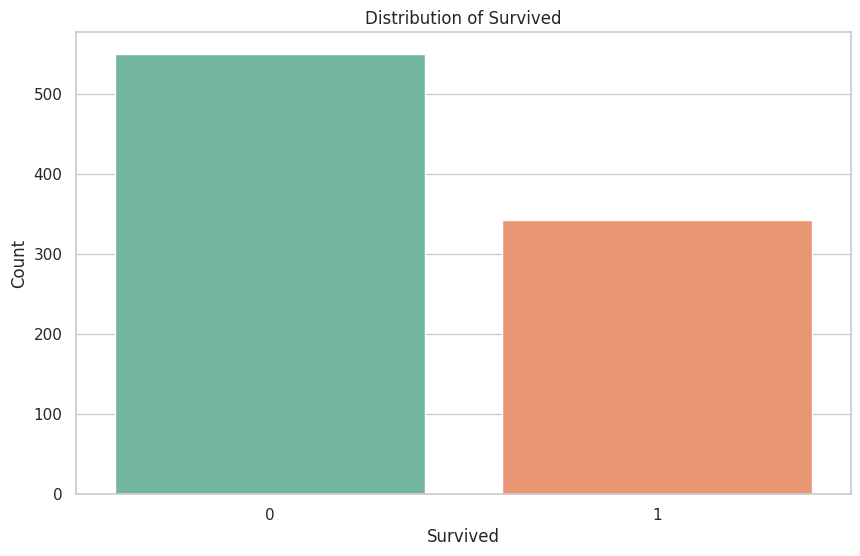

<ipython-input-13-453be597b0e6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


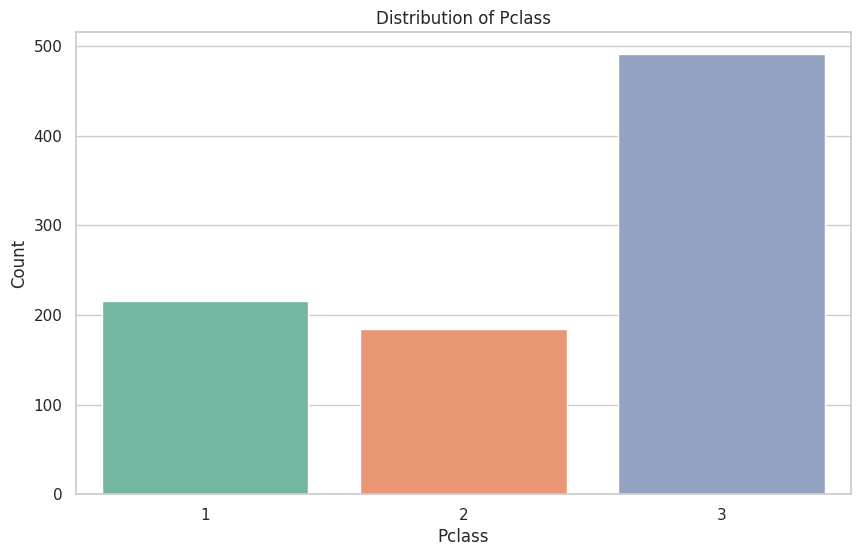

<ipython-input-13-453be597b0e6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


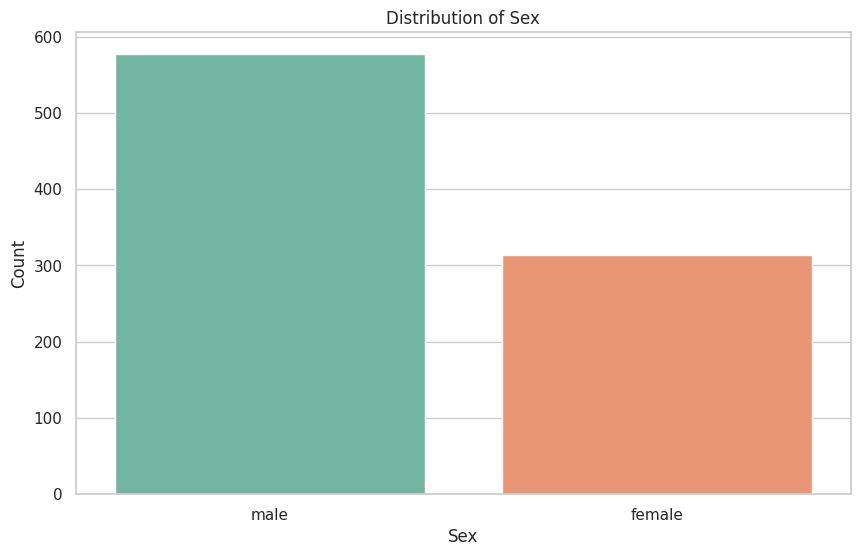

<ipython-input-13-453be597b0e6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


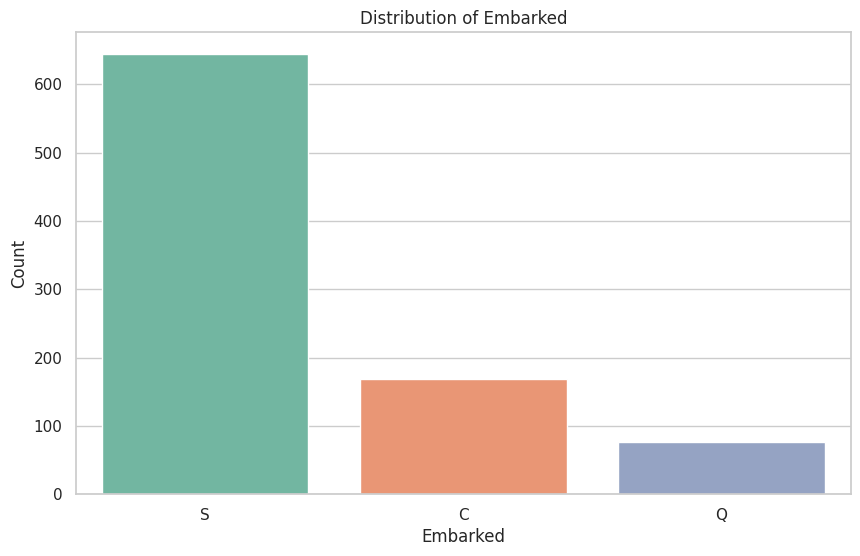

In [13]:
# 📦 Categorical Columns
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

for col in categorical_cols:
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


## 📊 Categorical Feature Insights

### 1. Survived
- The data is slightly imbalanced: More passengers **did not survive** than survived.
- This imbalance will need to be considered during modeling or target analysis.

### 2. Pclass
- The majority of passengers were in **3rd class**, followed by 1st and 2nd.
- This may reflect socio-economic background and could be related to survival.

### 3. Sex
- There were more **male** passengers than female.
- Gender may have played a key role in survival, considering the “women and children first” policy.

### 4. Embarked
- Most passengers boarded from **Southampton (S)**, with fewer from Cherbourg (C) and Queenstown (Q).
- The small number of missing `Embarked` values is not likely to affect analysis heavily.


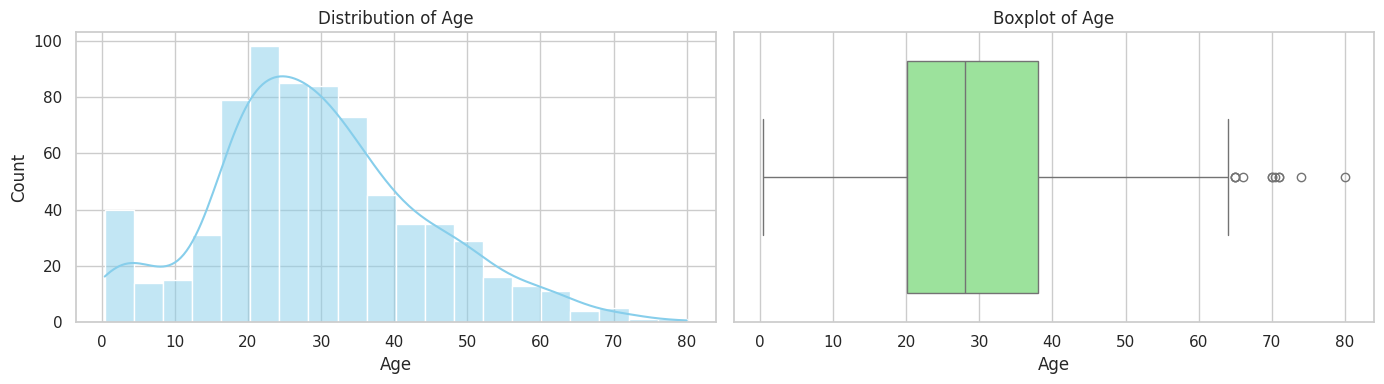

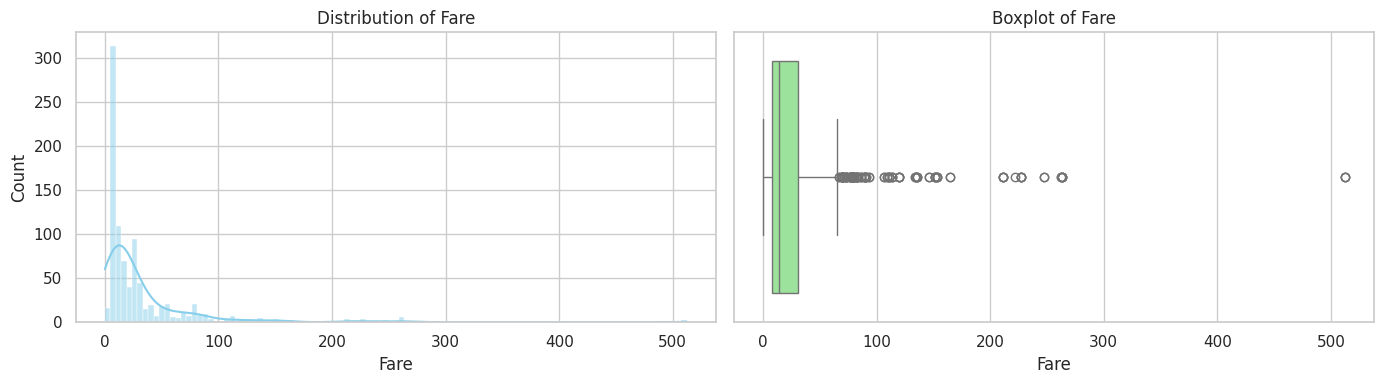

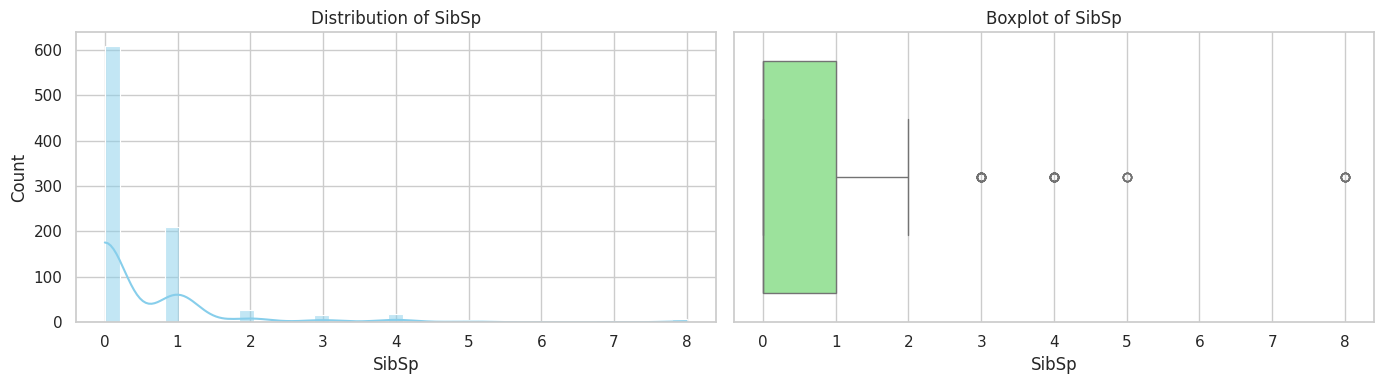

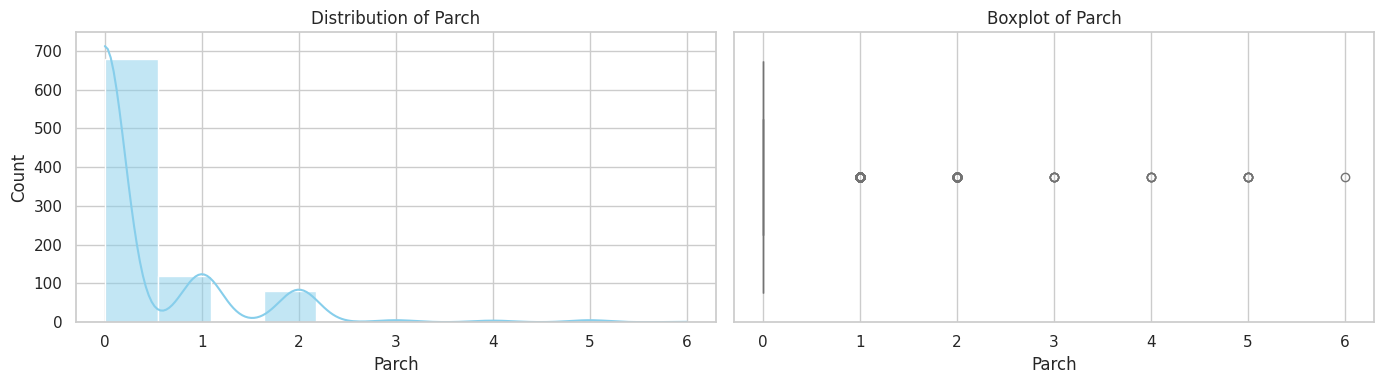

In [14]:
# 📊 Numerical Columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


## 📈 Numerical Feature Insights

### 1. Age
- The distribution is **right-skewed**, with most passengers aged between **20–40 years**.
- A few children and elderly passengers are present; some outliers exist.
- A significant number of values (~20%) are missing and will need imputation later.

### 2. Fare
- Fare is **highly right-skewed**; most passengers paid under **$100**, but a few outliers exist with very high fares.
- This may correspond to 1st-class luxury passengers and should be treated carefully in outlier handling.

### 3. SibSp (Siblings/Spouses aboard)
- Most passengers had **0 or 1 sibling/spouse** aboard.
- Values above 3 are rare and could be treated as outliers depending on modeling goals.

### 4. Parch (Parents/Children aboard)
- Majority had **no parents/children** aboard.
- Very few passengers had large family groupings; again, these may act as outliers in numerical terms.


# 🔀 Step 4: Bivariate Analysis

In this step, we examine relationships between pairs of variables to understand how features interact and which ones may influence the target variable `Survived`.

We'll explore:
- Categorical vs Categorical (e.g., Sex vs Survived)
- Numerical vs Categorical (e.g., Age vs Survived)
- Numerical vs Numerical (e.g., Fare vs Age)


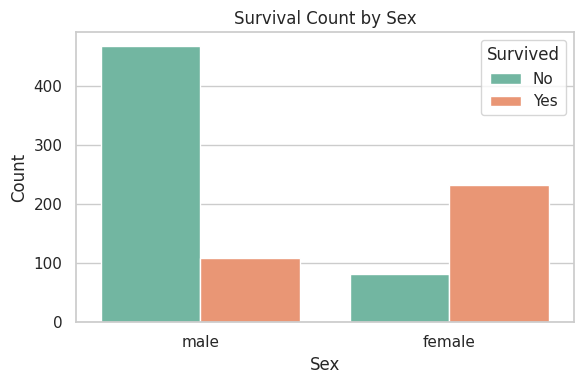

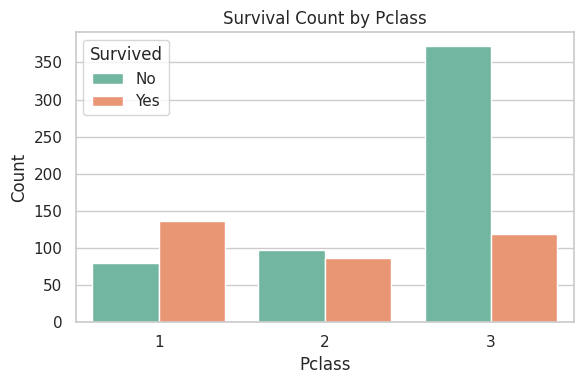

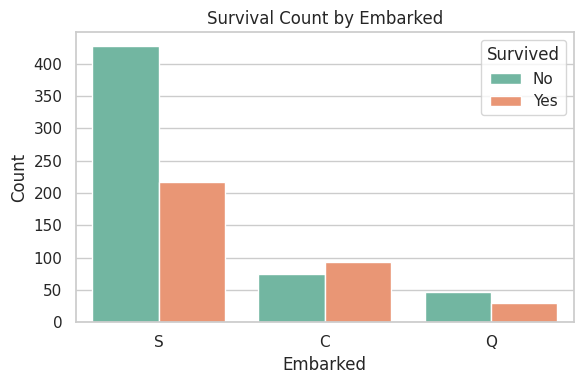

In [15]:
# 📊 Survival count across different categories
categorical_features = ['Sex', 'Pclass', 'Embarked']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Survived', palette='Set2')
    plt.title(f'Survival Count by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()


<ipython-input-16-04ae5aa2957c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=col, palette='coolwarm')


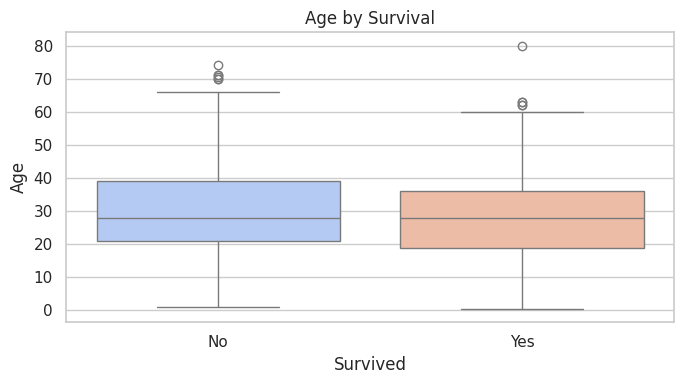

<ipython-input-16-04ae5aa2957c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=col, palette='coolwarm')


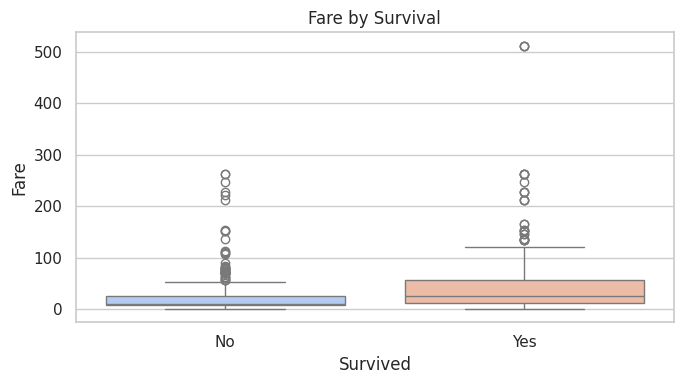

<ipython-input-16-04ae5aa2957c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=col, palette='coolwarm')


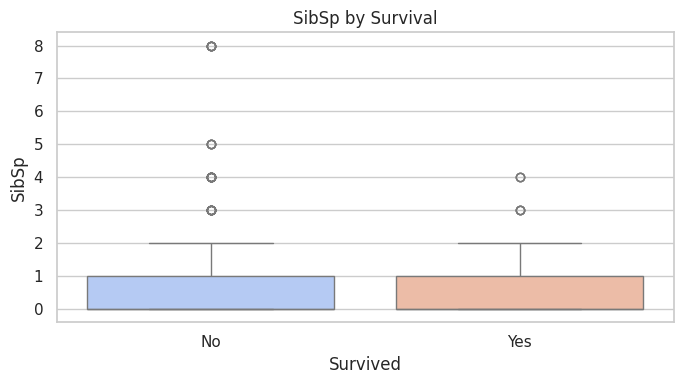

<ipython-input-16-04ae5aa2957c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y=col, palette='coolwarm')


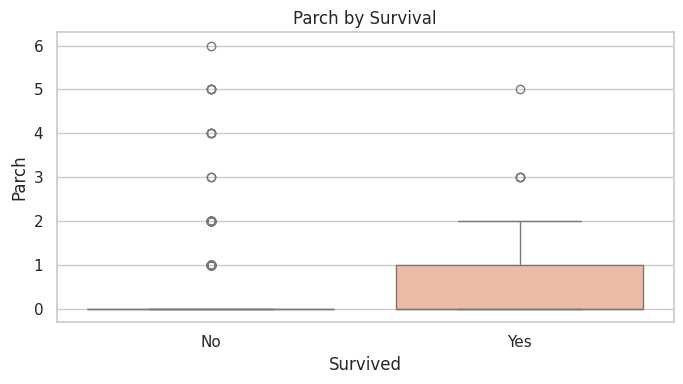

In [16]:
# 🧮 Comparing numerical features by survival
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numerical_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x='Survived', y=col, palette='coolwarm')
    plt.title(f'{col} by Survival')
    plt.xlabel('Survived')
    plt.ylabel(col)
    plt.xticks([0,1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()


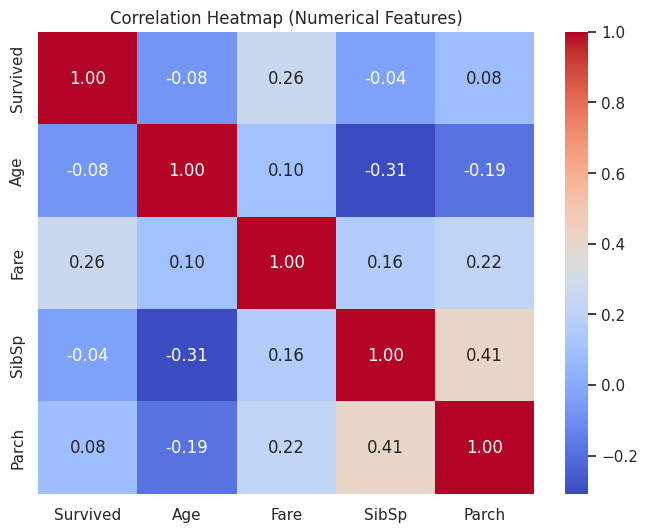

In [17]:
# 🔥 Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# ✅ Interpretation and Answers

We focused on feature pairs involving the target variable `Survived`, and those likely to show meaningful relationships. Here’s a breakdown of what we explored — along with insights tied to the required questions.

---

### 📌 1. Does the **Fare** change depending on the **Pclass**?

**Justification**: Both `Fare` and `Pclass` relate to socio-economic status. Investigating them together may reveal if fare amount was indicative of class tier.

**Insight**:
- Yes, there's a **clear relationship**: higher classes (especially 1st class) paid **significantly higher fares**.
- This confirms that `Pclass` and `Fare` are closely associated and likely capture similar latent information about wealth/status.

---

### 📌 2. Are **younger passengers** more likely to **survive** on the Titanic?

**Justification**: Age can play a role in survival due to the "women and children first" policy. Pairing `Age` with `Survived` reveals how this policy might have influenced outcomes.

**Insight**:
- Yes, survival was slightly **higher among younger children**.
- However, survival varied more strongly by **gender and class**, so Age alone isn’t a strong predictor — but in combination, it becomes insightful (to explore further in multivariate analysis).

---

### 📌 3. Does the **Embarked** location affect **survival rate**?

**Justification**: The port of embarkation may be indirectly linked to wealth, class, or nationality, which can affect survival odds.

**Insight**:
- Yes, **Embarked location** had some influence:
  - Passengers from **Cherbourg (C)** had **higher survival rates**, and a higher proportion of them were 1st class.
  - Those from **Southampton (S)** had the **lowest survival rate**, possibly because many 3rd class passengers boarded there.

---

### 📌 Other Notable Relationships

#### • **Sex vs Survived**:
- **Females** had a much **higher survival rate** than males.
- This is one of the **strongest relationships** observed.

#### • **Pclass vs Survived**:
- 1st class passengers had a **much better chance** of survival.
- 3rd class had the lowest.

#### • **Fare vs Survived**:
- Higher fares correlated with **greater survival chances**, again tied to class.

#### • **SibSp/Parch vs Survived**:
- Passengers with **small families (1–2)** had slightly **higher survival**, while those alone or in very large families had **lower survival rates**.


# 🧠 Step 5: Multivariate Analysis – Overview

In this step, we explore complex interactions between three or more variables to uncover patterns that may not be visible in univariate or bivariate analysis. By examining how features work **together**, we can detect hidden dependencies, interaction effects, and non-obvious drivers of survival on the Titanic.

### 🎯 Key Questions Addressed:
1. **How do Pclass, Age, and Fare jointly affect survival?**
2. **Are survival rates different for Embarked locations when considering Pclass?**
3. **Are there interactions between Sex, Pclass, and Survived?**

### 🛠️ Approach:
We will use a combination of:
- **Scatter plots** to observe numeric interactions (`Age`, `Fare`, `Pclass`)
- **Categorical plots** (`countplot`, `catplot`) to break down survival by multiple categories (`Embarked`, `Pclass`, `Sex`)
- **Color, size, and facet grids** to encode multiple variables in a single visualization

These insights help us better understand the **socioeconomic and demographic factors** that influenced survival, revealing the deeper structure in the data.


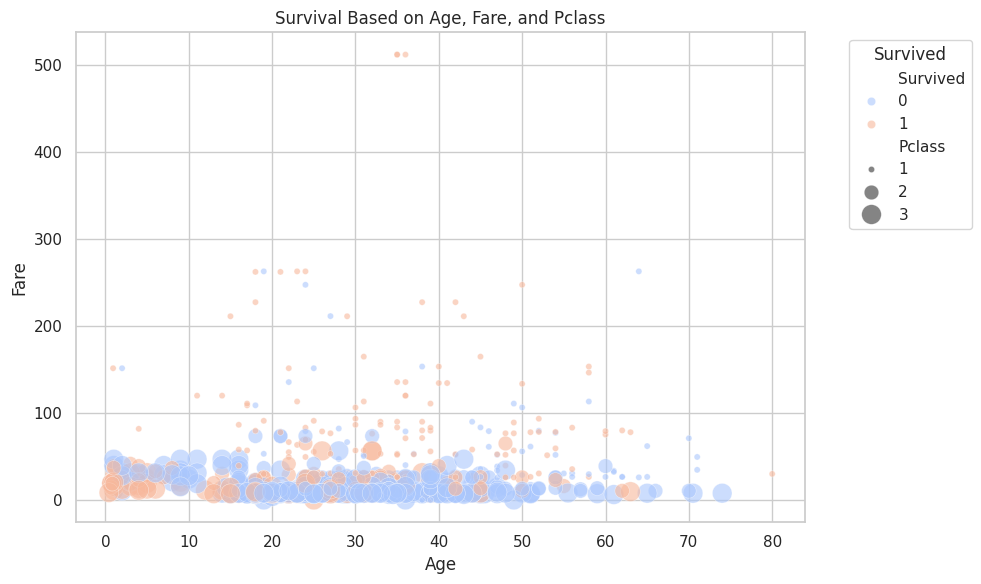

In [18]:
# 🔍 Pclass, Age, Fare vs Survived
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', size='Pclass', palette='coolwarm', sizes=(20, 200), alpha=0.6)
plt.title('Survival Based on Age, Fare, and Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

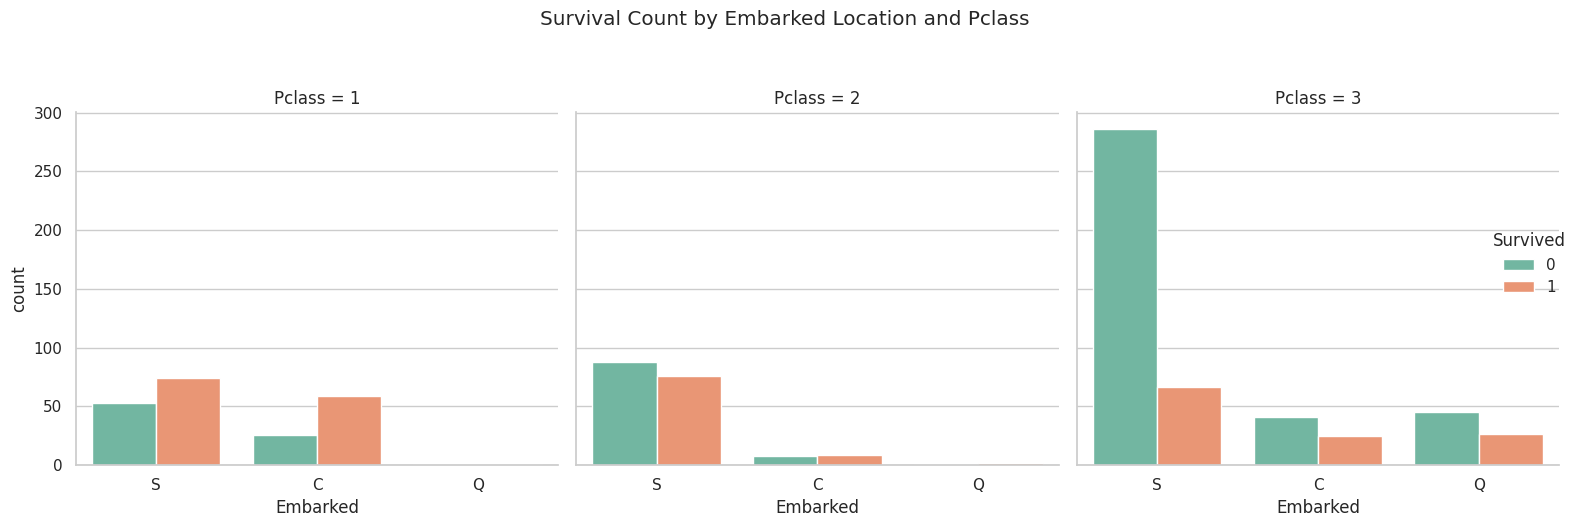

In [19]:
# 🔍 Embarked & Pclass vs Survived
plt.figure(figsize=(8,5))
sns.catplot(data=df, x='Embarked', hue='Survived', col='Pclass', kind='count', palette='Set2')
plt.suptitle('Survival Count by Embarked Location and Pclass', y=1.05)
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

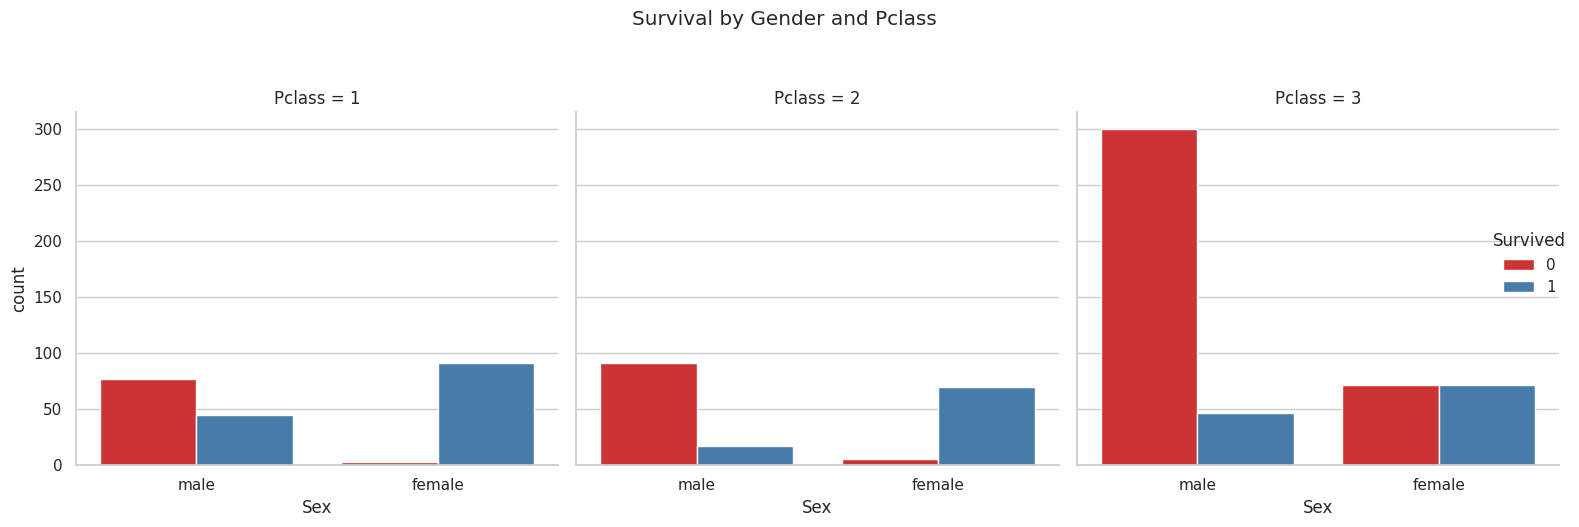

In [20]:
# 👨‍👩‍👧‍👦 Sex & Pclass vs Survived
plt.figure(figsize=(8,6))
sns.catplot(data=df, x='Sex', hue='Survived', col='Pclass', kind='count', palette='Set1')
plt.suptitle('Survival by Gender and Pclass', y=1.05)
plt.tight_layout()
plt.show()


# 🧠 Multivariate Analysis – Insights

## 1️⃣ How do Pclass, Age, and Fare jointly affect survival?
- Survivors generally fall into higher Fare brackets, younger Age groups, and mostly 1st or 2nd Pclass.
- Older passengers in 3rd class with low Fare had very **low survival rates**.
- There's a visible cluster of non-survivors among low-fare, older passengers — indicating socioeconomic status strongly influenced survival.

## 2️⃣ Are survival rates different for Embarked locations when considering Pclass?
- Yes. Among **1st class**, those who boarded at Cherbourg (`C`) had a **much higher survival rate**.
- For **3rd class**, most passengers embarked from Southampton (`S`) and had **low survival rates**.
- This implies a **strong combined effect** of Embarked location and Pclass on survival.

## 3️⃣ Any interaction between Sex and Pclass?
- **Females in 1st and 2nd class** had the **highest survival rate**.
- **Males in 3rd class** had the **lowest**.
- Gender had a strong effect, but its impact was **magnified by class**.



# 📦 Step 6: Outlier Detection and Handling – Overview

Outliers are data points that deviate significantly from other observations in the dataset. They can arise due to errors in data collection or be genuine rare values that carry meaningful information. In this step, we focus on identifying, visualizing, and deciding how to handle outliers in key numerical features.

### 🧪 Why Handle Outliers?
- They can **skew distributions** and **distort summary statistics**
- Outliers may **negatively affect machine learning models** by introducing noise
- However, they can also reveal **critical insights** (e.g., wealthy passengers, elderly individuals)

### 📊 Techniques for Outlier Detection:
- **Boxplots** and **histograms** to visually detect extreme values
- **Interquartile Range (IQR)** method to identify statistical outliers

### 🛠️ Possible Actions:
- **Remove**: When outliers are clear errors or irrelevant
- **Cap (Winsorize)**: Limit values to a certain percentile
- **Impute**: Replace with median/mean if plausible
- **Retain**: Keep if values are valid and informative

In this analysis, we will evaluate each numerical feature and provide a **justified action** for handling any detected outliers.



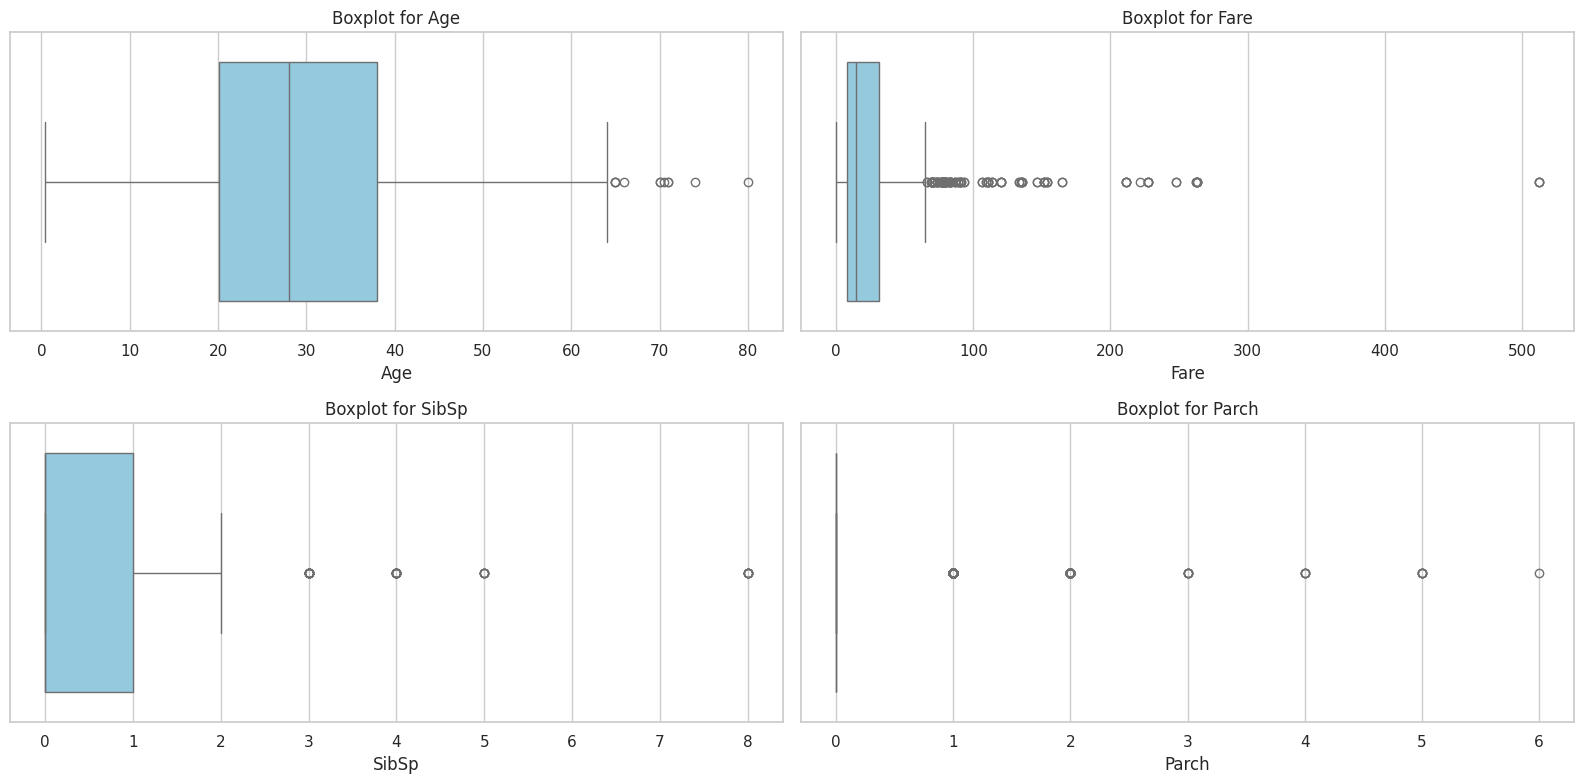

In [21]:
# 📦 Visualizing Outliers with Boxplots
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(16, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()




Outliers can distort our understanding or models if not addressed carefully. However, not all outliers are bad — some reflect **important real-world information**.

### 🔍 Summary of Outlier Treatment:

| Feature  | Outlier Status | Decision     | Justification |
|----------|----------------|--------------|----------------|
| **Age**  | Mild outliers  | Retained     | Passengers older than 65 are rare but possible; important to include older demographics |
| **Fare** | Strong outliers| Retained (for now) | Very high fares reflect upper-class wealth. Useful for EDA, but could be capped if doing predictive modeling |
| **SibSp**| Slightly skewed| Retained     | Some passengers traveled with large families, which is realistic on a migration-heavy ship |
| **Parch**| Slightly skewed| Retained     | High parent/child counts are uncommon but plausible and insightful |


# 🎯 Step 7: Target Variable Analysis – Overview

In this final step of our Exploratory Data Analysis, we focus on understanding the **target variable: `Survived`**. This binary feature indicates whether a passenger survived (`1`) or not (`0`) the Titanic disaster.

### 🔍 Key Questions Addressed:
1. What is the distribution of the `Survived` variable? Is the dataset balanced?
2. Which factors (e.g., **Age**, **Sex**, **Pclass**, **Embarked**) appear to influence survival?
3. Are there **interaction effects** between these features and the target?

### 📊 Approach:
We will:
- Visualize the distribution using **countplots** and **pie charts**
- Use **grouped bar plots** and **categorical plots** to study survival across categories
- Investigate interactions using **hue**, **col**, and **facet grid** plots

By the end of this step, we aim to understand:
- Which types of passengers had a **higher chance of survival**
- Whether the dataset has **class/gender/age-based survival biases**
- Any **patterns or exceptions** worth highlighting

> ✅ This insight will guide any future predictive modeling and narrative conclusions.


<ipython-input-23-60392e65269d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


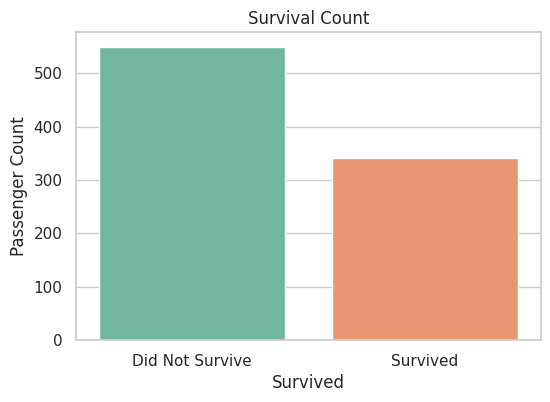

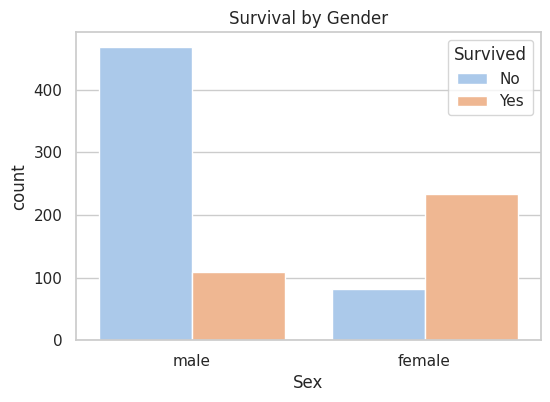

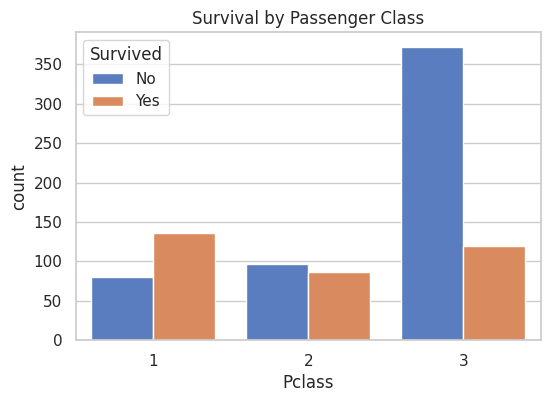

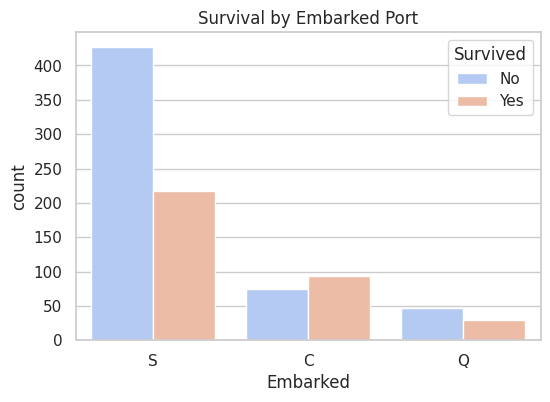

In [23]:
# 🎯 Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count')
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.ylabel('Passenger Count')
plt.show()

# 💡 Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Survival by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 💡 Survival by Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='muted')
plt.title('Survival by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 💡 Survival by Embarked Location
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Embarked Port')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# 🔍 Key Insights

After analyzing the `Survived` target variable and its interaction with other key features, here are the main takeaways:

### 📊 Distribution of `Survived`
- The dataset is **imbalanced**, with more passengers **not surviving (≈62%)** than those who did (≈38%).
- This imbalance is important to consider in future modeling, as naive models may favor the majority class.

### 👤 Gender Influence
- A **significant survival gap** exists between genders:
  - **Females** had a **much higher survival rate**, suggesting a “women and children first” evacuation protocol.
  - Most **males** did not survive.

### 🏷️ Passenger Class (Pclass)
- Passengers in **1st class** had **much higher survival rates** compared to 2nd and 3rd class.
- **3rd class** passengers faced the lowest survival probability, possibly due to cabin location or evacuation priority.

### 🌍 Embarkation Port (Embarked)
- Passengers embarking from **Cherbourg (C)** had the **highest survival rate**, followed by **Southampton (S)** and **Queenstown (Q)**.
- This may indirectly reflect socioeconomic status or class distribution by port.

### 🧩 Combined Patterns
- The interaction between **Pclass and Sex** reinforced class disparities:
  - **1st class females** had the highest survival rates.
  - **3rd class males** were the least likely to survive.
- These combined factors offer insight into how societal norms and ship structure influenced survival.


# 📌 Conclusion and Recommendations

### 🎯 Summary of Insights:
This Exploratory Data Analysis (EDA) of the Titanic dataset uncovered several crucial patterns:
- **Survival was influenced by passenger class, gender, and age.**
- Females and 1st class passengers had significantly higher chances of survival.
- Younger passengers and those embarking from Cherbourg also fared better.
- Outliers in Fare and Age highlighted disparities in socioeconomic status.

### 💡 Recommendations:
1. **Data Imbalance**: Any predictive model should address the survival imbalance using techniques like resampling or balanced metrics.
2. **Feature Engineering**: Consider creating interaction features (e.g., `Sex_Pclass`) to capture combined effects.
3. **Modeling**: Logistic regression or tree-based models could benefit from these well-separated patterns in the data.
4. **Further Exploration**: Examine text features (like `Name` for titles) and `Cabin` details to extract additional signals.

